In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

In [2]:
CLASS_NAMES = ['daisy','dandelion','roses','sunflowers', 'tulips']
CLASS_NAMES

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

jpeg: tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x04HICC_PROFILE\x00\x01\x01\x00\x00\x048appl\x02 \x00\x00mntrRGB XYZ \x07\xd0\x00\x08\x00\r\x00\x10\x00\x06\x00\x07acspAPPL\x00\x00\x00\x00appl\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-appl\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0ccprt\x00\x00\x02\x04\x00\x00\x00Hdesc\x00\x00\x01\x14\x00\x00\x001wtpt\x00\x00\x01H\x00\x00\x00\x14rTRC\x00\x00\x01\\\x00\x00\x00\x0egTRC\x00\x00\x01\\\x00\x00\x00\x0ebTRC\x00\x00\x01\\\x00\x00\x00\x0erXYZ\x00\x00\x01l\x00\x00\x00\x14gXYZ\x00\x00\x01\x80\x00\x00\x00\x14bXYZ\x00\x00\x01\x94\x00\x00\x00\x14vcgt\x00\x00\x01\xa8\x00\x00\x000chad\x00\x00\x01\xd8\x00\x00\x00,dscm\x00\x00\x02L\x00\x00\x01\xeadesc\x00\x00\x00\x00\x00\x00\x00\rsRGB Profile\x00\x

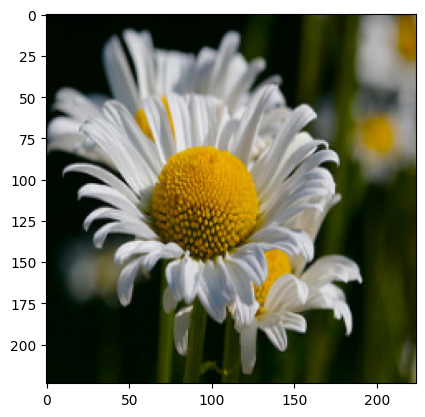

In [3]:
def read_and_decode(filename, reshape_dims):
    img = tf.io.read_file(filename)                      # jpeg 16진수
    print('jpeg:', img)
    img = tf.image.decode_jpeg(img, channels = IMG_CHANNELS)  # 픽셀로 변환
    print('pixel:', img)
    img = tf.image.convert_image_dtype(img, tf.float32)   # 0~1로 정규화
    print('정규화:', img)
    return tf.image.resize(img, reshape_dims)

def show_image(filename):
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    plt.imshow((img.numpy()));

show_image('c:/workspace/Data/flowers/daisy/754296579_30a9ae018c_n.jpg')

jpeg: tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x058ICC_PROFILE\x00\x01\x01\x00\x00\x05(appl\x02 \x00\x00mntrRGB XYZ \x07\xd2\x00\x05\x00\r\x00\x0c\x00\x00\x00\x00acspAPPL\x00\x00\x00\x00appl\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-appl\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\rrXYZ\x00\x00\x01 \x00\x00\x00\x14gXYZ\x00\x00\x014\x00\x00\x00\x14bXYZ\x00\x00\x01H\x00\x00\x00\x14wtpt\x00\x00\x01\\\x00\x00\x00\x14chad\x00\x00\x01p\x00\x00\x00,rTRC\x00\x00\x01\x9c\x00\x00\x00\x0egTRC\x00\x00\x01\x9c\x00\x00\x00\x0ebTRC\x00\x00\x01\x9c\x00\x00\x00\x0edesc\x00\x00\x01\xac\x00\x00\x00?cprt\x00\x00\x02T\x00\x00\x00Hvcgt\x00\x00\x01\xec\x00\x00\x000ndin\x00\x00\x02\x1c\x00\x00\x008dscm\x00\x00\x02\x9c\x00\x00\x02\x8cXYZ \x00\x00\x00\x00\x0

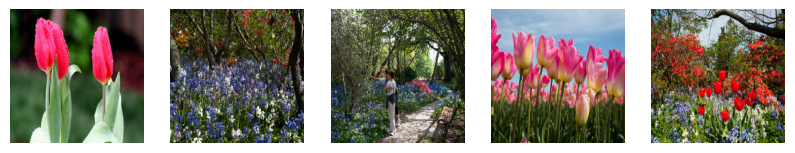

In [4]:
tulips = tf.io.gfile.glob('c:/workspace/Data/flowers/tulips/*.jpg')
f, ax = plt.subplots(1,5,figsize=(10,10))
for idx, filename in enumerate(tulips[:5]):
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    ax[idx].imshow((img.numpy()))
    ax[idx].axis('off')

In [8]:
def decode_csv(csv_row):
    record_defaults = ['path', 'flower']
    filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
    return img, label

# 800장 뽑아서 32개씩 보내줌
train_dataset = (tf.data.TextLineDataset("c:/workspace/Data/flowers/train_set.csv").map(decode_csv)).take(800).batch(32)
eval_dataset = (tf.data.TextLineDataset("c:/workspace/Data/flowers/eval_set.csv").map(decode_csv)).take(200).batch(32)

jpeg: Tensor("ReadFile:0", shape=(), dtype=string)
pixel: Tensor("DecodeJpeg:0", shape=(None, None, 3), dtype=uint8)
정규화: Tensor("convert_image:0", shape=(None, None, 3), dtype=float32)
jpeg: Tensor("ReadFile:0", shape=(), dtype=string)
pixel: Tensor("DecodeJpeg:0", shape=(None, None, 3), dtype=uint8)
정규화: Tensor("convert_image:0", shape=(None, None, 3), dtype=float32)


In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# 선형모델
model = tf.keras.Sequential([
    Flatten(input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
    Dense(len(CLASS_NAMES), activation='softmax')
])
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
                        # 원핫인코딩 안했을 때 sparse~, 메모리절약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 5)                 752645    
                                                                 
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=20)

Epoch 1/20
25/25 [==============================] - 3s 111ms/step - loss: 36.1577 - accuracy: 0.2338 - val_loss: 16.4549 - val_accuracy: 0.3550
Epoch 2/20
25/25 [==============================] - 1s 55ms/step - loss: 12.8010 - accuracy: 0.4013 - val_loss: 13.5460 - val_accuracy: 0.3450
Epoch 3/20
25/25 [==============================] - 1s 54ms/step - loss: 9.6855 - accuracy: 0.4512 - val_loss: 13.9174 - val_accuracy: 0.3950
Epoch 4/20
25/25 [==============================] - 1s 47ms/step - loss: 10.2225 - accuracy: 0.4625 - val_loss: 12.1036 - val_accuracy: 0.3700
Epoch 5/20
25/25 [==============================] - 1s 52ms/step - loss: 12.6342 - accuracy: 0.4300 - val_loss: 18.6541 - val_accuracy: 0.3400
Epoch 6/20
25/25 [==============================] - 1s 58ms/step - loss: 10.4045 - accuracy: 0.4550 - val_loss: 14.0643 - val_accuracy: 0.3450
Epoch 7/20
25/25 [==============================] - 1s 54ms/step - loss: 10.6872 - accuracy: 0.4963 - val_loss: 9.1498 - val_accuracy: 0.4000


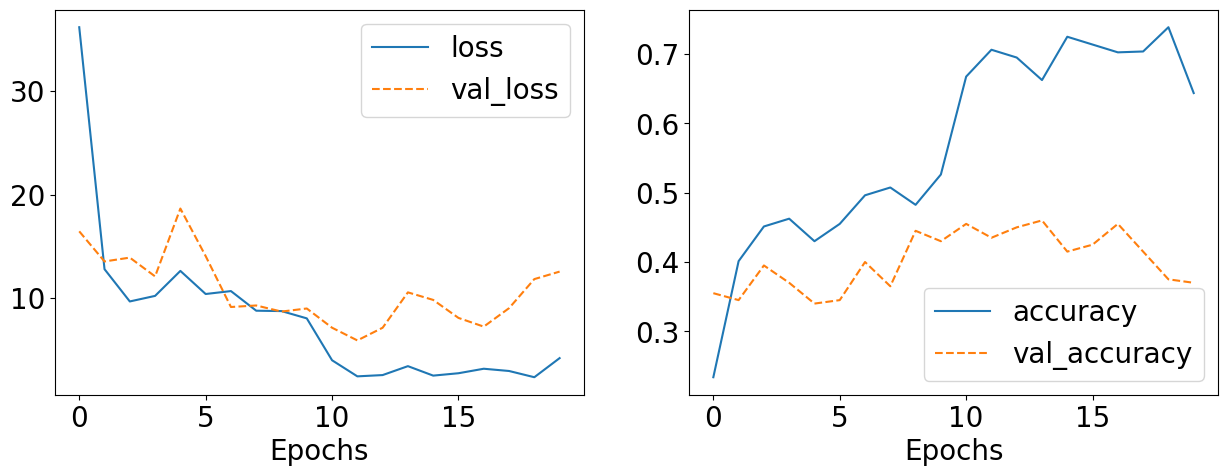

In [11]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        ax[idx].plot(history.history['val_' + metric], ls='dashed');
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)
training_plot(['loss', 'accuracy'], history)


jpeg: Tensor("ReadFile:0", shape=(), dtype=string)
pixel: Tensor("DecodeJpeg:0", shape=(None, None, 3), dtype=uint8)
정규화: Tensor("convert_image:0", shape=(None, None, 3), dtype=float32)
1/1 [==============================] - 0s 23ms/step


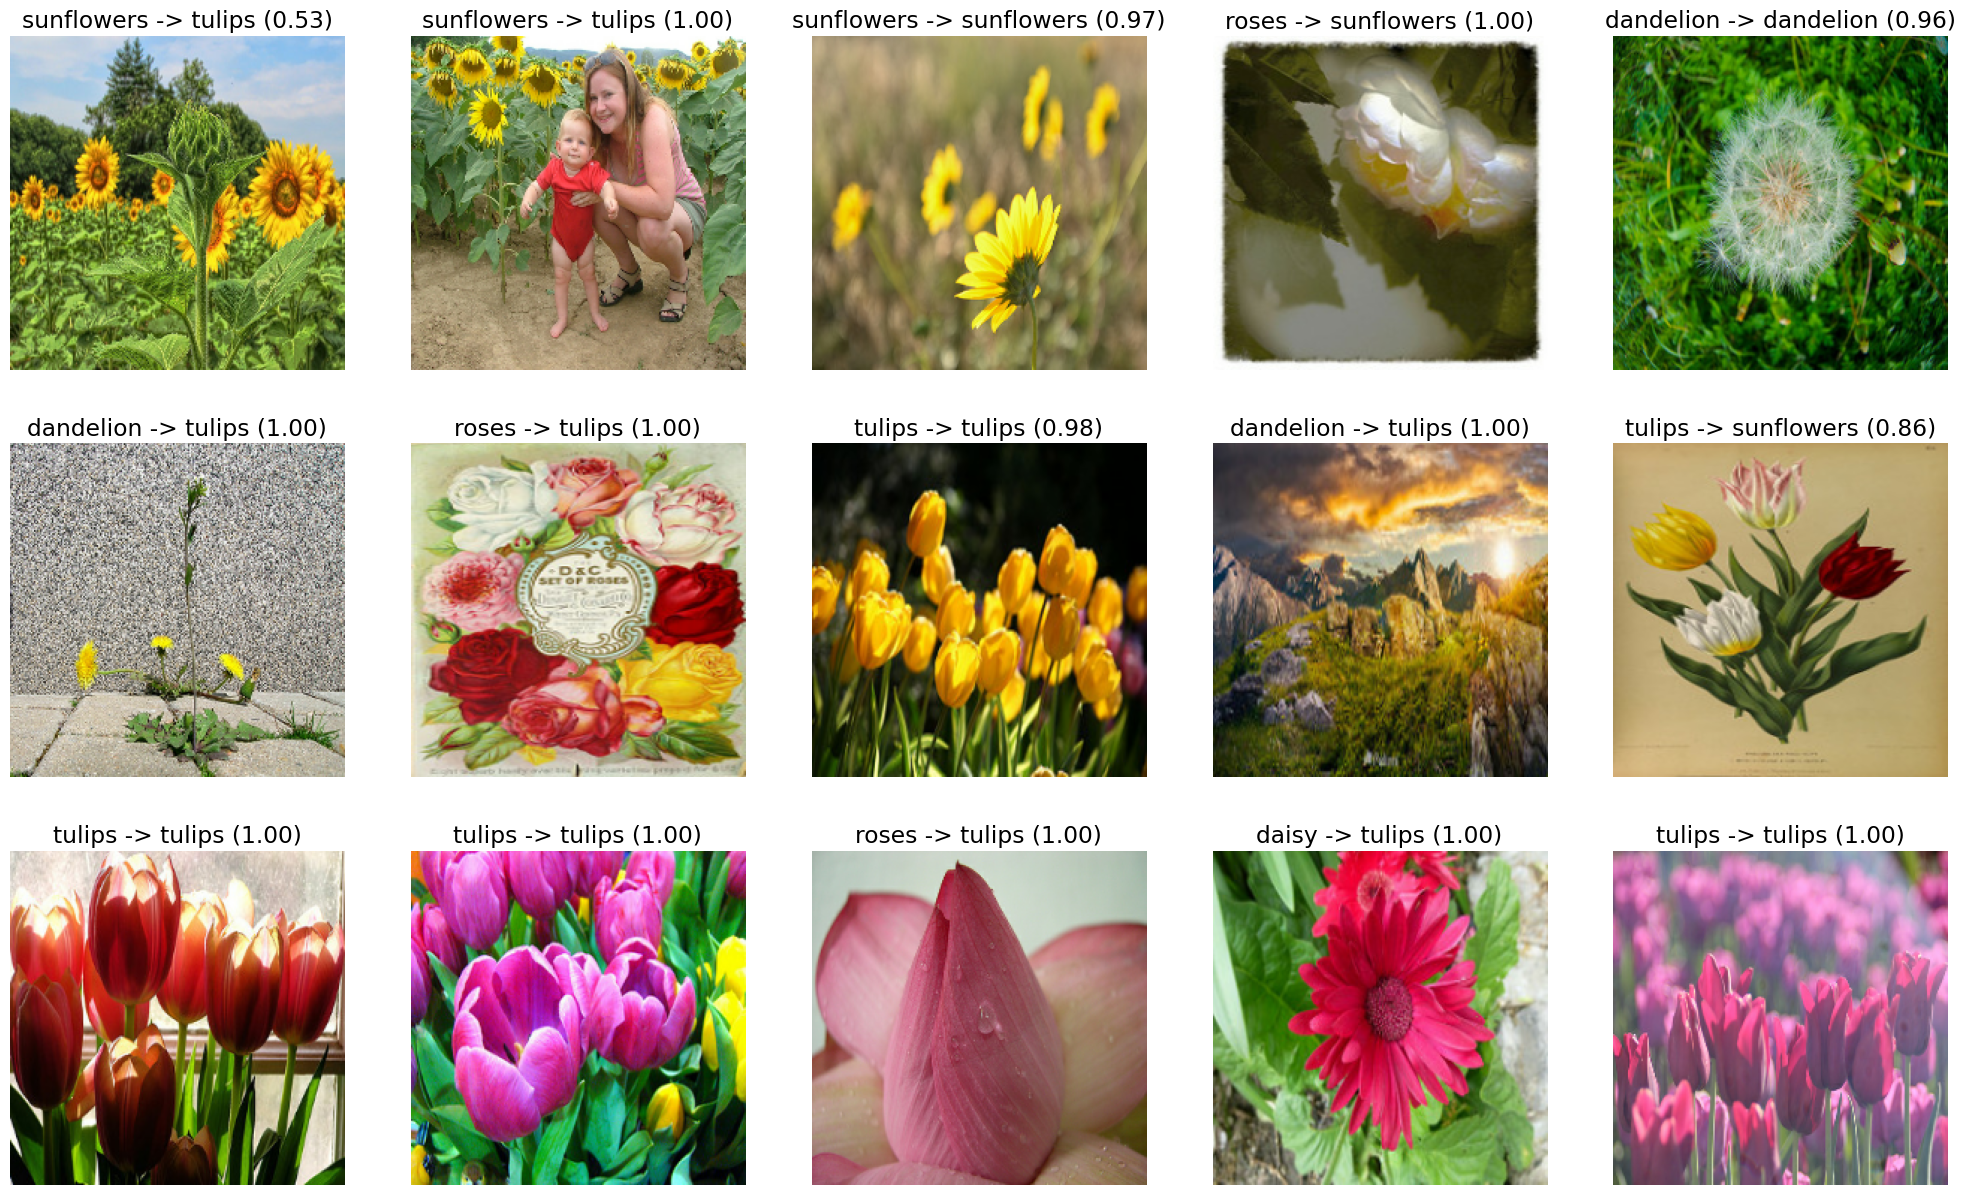

In [12]:
def plot_predictions(filename):
  matplotlib.rcParams.update({'font.size': 14})
  f, ax = plt.subplots(3, 5, figsize=(25,15))
  dataset = (tf.data.TextLineDataset(filename).map(decode_csv))
  for idx, (img, label) in enumerate(dataset.skip(20).take(15)):
    ax[idx//5, idx%5].imshow((img.numpy()));
    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
    batch_pred = model.predict(batch_image)
    pred = batch_pred[0]
    label = CLASS_NAMES[label.numpy()]
    pred_label_index = tf.math.argmax(pred).numpy()
    pred_label = CLASS_NAMES[pred_label_index]
    prob = pred[pred_label_index]
    ax[idx//5, idx%5].set_title('{} -> {} ({:.2f})'.format(label, pred_label, prob))
    ax[idx//5, idx%5].axis('off')
plot_predictions("c:/workspace/Data/flowers/eval_set.csv")
